In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline

c:\users\karthik.vullam\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\karthik.vullam\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [8]:
#showing how many customers belong to particular class
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029FD40B75F8>]],
      dtype=object)

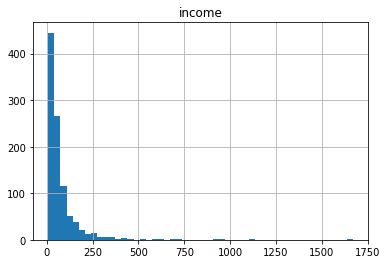

In [13]:
df.hist(column='income', bins=50)

In [14]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [18]:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array
X= df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values

In [19]:
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [23]:
Y = df[['custcat']].values

In [24]:
Y

array([[1],
       [4],
       [3],
       [1],
       [3],
       [3],
       [2],
       [4],
       [3],
       [2],
       [1],
       [3],
       [1],
       [4],
       [1],
       [2],
       [3],
       [3],
       [1],
       [4],
       [2],
       [1],
       [4],
       [1],
       [3],
       [3],
       [4],
       [3],
       [1],
       [2],
       [2],
       [4],
       [3],
       [2],
       [4],
       [2],
       [4],
       [3],
       [3],
       [3],
       [3],
       [3],
       [1],
       [4],
       [3],
       [2],
       [2],
       [4],
       [1],
       [3],
       [1],
       [2],
       [4],
       [1],
       [1],
       [1],
       [2],
       [1],
       [3],
       [2],
       [3],
       [4],
       [1],
       [4],
       [4],
       [1],
       [3],
       [3],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [3],
       [1],
       [3],
       [1],
       [3],
       [4],
       [4],
       [1],
       [4],
    

In [31]:
#Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [32]:
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
k = 4
neighbors = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
neighbors

c:\users\karthik.vullam\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [42]:
y_pred = neighbors.predict(X_test)
y_pred[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [44]:
from sklearn import metrics

In [45]:
print("Train set accuracy: ", metrics.accuracy_score(Y_train, neighbors.predict(X_train)))
print("Test set accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Train set accuracy:  0.5475
Test set accuracy:  0.32


In [48]:
k = 6
neighbors1 = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
neighbors1

c:\users\karthik.vullam\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [53]:
from sklearn import metrics
print("Train set accuracy: ", metrics.accuracy_score(Y_train, neighbors1.predict(X_train)))
print("Test Set accuracy: ", metrics.accuracy_score(Y_test, neighbors1.predict(X_test)))

Train set accuracy:  0.51625
Test Set accuracy:  0.31


To choose the best K we calculate the accuracy for certain k's and pick the highest accurate models' K

In [63]:
ks = 15
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
confusion_matrix = []

In [64]:
for i in range(1,ks):
    neighbors = KNeighborsClassifier(n_neighbors=i).fit(X_train, Y_train)
    y_pred = neighbors.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(Y_test, y_pred)
    std_acc[i-1] = np.std(y_pred==Y_test)/np.sqrt(y_pred.shape[0])
mean_acc

c:\users\karthik.vullam\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\karthik.vullam\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\karthik.vullam\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
c:\users\karthik.vullam\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315])

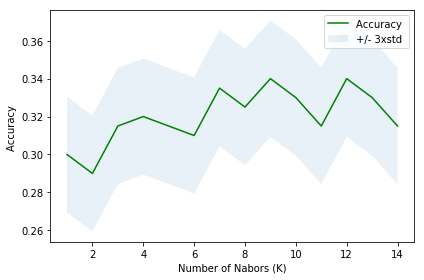

In [68]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [66]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9
